In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:01<00:00, 115MB/s]
100% 163M/163M [00:01<00:00, 109MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1215.jpg', 'with_mask_3451.jpg', 'with_mask_3674.jpg', 'with_mask_1023.jpg', 'with_mask_203.jpg']
['with_mask_1954.jpg', 'with_mask_3331.jpg', 'with_mask_1950.jpg', 'with_mask_2980.jpg', 'with_mask_2826.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1371.jpg', 'without_mask_1683.jpg', 'without_mask_38.jpg', 'without_mask_2120.jpg', 'without_mask_514.jpg']
['without_mask_2742.jpg', 'without_mask_430.jpg', 'without_mask_377.jpg', 'without_mask_2233.jpg', 'without_mask_3050.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


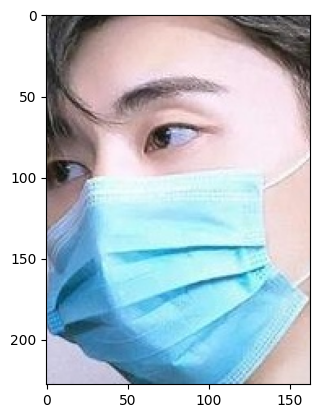

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

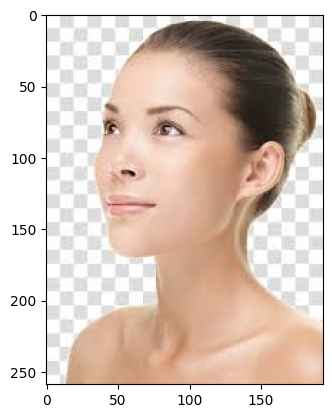

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[ 69, 109, 145],
        [ 74, 116, 151],
        [ 65, 109, 144],
        ...,
        [229, 231, 244],
        [232, 229, 241],
        [236, 230, 241]],

       [[ 68, 107, 142],
        [ 64, 105, 138],
        [ 58, 101, 135],
        ...,
        [227, 229, 242],
        [235, 233, 245],
        [234, 230, 241]],

       [[ 53,  91, 124],
        [ 61, 100, 130],
        [ 60, 102, 133],
        ...,
        [225, 230, 243],
        [232, 232, 244],
        [233, 231, 242]],

       ...,

       [[ 76, 121, 163],
        [ 79, 126, 168],
        [ 86, 134, 176],
        ...,
        [241, 255, 255],
        [241, 254, 254],
        [242, 254, 254]],

       [[ 84, 127, 168],
        [ 83, 129, 169],
        [ 78, 126, 166],
        ...,
        [243, 255, 254],
        [242, 254, 252],
        [243, 255, 253]],

       [[ 83, 130, 170],
        [ 81, 129, 169],
        [ 82, 132, 172],
        ...,
        [246, 253, 254],
        [243, 253, 253],
        [242, 254, 253]]], dtype=uint8)
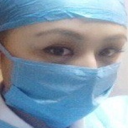

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 59,  45,  44],
        [ 66,  52,  51],
        [ 78,  64,  62],
        ...,
        [ 75,  56,  58],
        [ 84,  65,  67],
        [ 88,  69,  71]],

       [[ 62,  48,  47],
        [ 67,  53,  51],
        [ 78,  64,  61],
        ...,
        [ 73,  54,  56],
        [ 84,  65,  67],
        [ 90,  71,  73]],

       [[ 68,  54,  51],
        [ 72,  58,  55],
        [ 82,  68,  64],
        ...,
        [ 68,  49,  51],
        [ 81,  62,  64],
        [ 90,  71,  73]],

       ...,

       [[ 80,  78, 101],
        [ 75,  71,  93],
        [ 71,  69,  89],
        ...,
        [ 58,  43,  40],
        [ 59,  42,  40],
        [ 60,  42,  40]],

       [[ 79,  77,  98],
        [ 74,  72,  92],
        [ 72,  69,  89],
        ...,
        [ 58,  41,  38],
        [ 61,  43,  40],
        [ 62,  44,  42]],

       [[ 74,  73,  94],
        [ 71,  69,  89],
        [ 71,  68,  87],
        ...,
        [ 58,  39,  35],
        [ 60,  41,  38],
        [ 60,  42,  40]]], dtype=uint8)
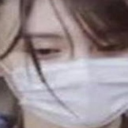

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.23137255, 0.17647059, 0.17254902],
        [0.25882353, 0.20392157, 0.2       ],
        [0.30588235, 0.25098039, 0.24313725],
        ...,
        [0.29411765, 0.21960784, 0.22745098],
        [0.32941176, 0.25490196, 0.2627451 ],
        [0.34509804, 0.27058824, 0.27843137]],

       [[0.24313725, 0.18823529, 0.18431373],
        [0.2627451 , 0.20784314, 0.2       ],
        [0.30588235, 0.25098039, 0.23921569],
        ...,
        [0.28627451, 0.21176471, 0.21960784],
        [0.32941176, 0.25490196, 0.2627451 ],
        [0.35294118, 0.27843137, 0.28627451]],

       [[0.26666667, 0.21176471, 0.2       ],
        [0.28235294, 0.22745098, 0.21568627],
        [0.32156863, 0.26666667, 0.25098039],
        ...,
        [0.26666667, 0.19215686, 0.2       ],
        [0.31764706, 0.24313725, 0.25098039],
        [0.35294118, 0.27843137, 0.28627451]],

       ...,

       [[0.31372549, 0.30588235, 0.39607843],
        [0.29411765, 0.27843137, 0.36470588],
        [0.27843137, 0

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 154s 888ms/step - accuracy: 0.7243 - loss: 0.7024 - val_accuracy: 0.8942 - val_loss: 0.2420
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 199s 875ms/step - accuracy: 0.8789 - loss: 0.2900 - val_accuracy: 0.9058 - val_loss: 0.2186
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 149s 872ms/step - accuracy: 0.9124 - loss: 0.2369 - val_accuracy: 0.8860 - val_loss: 0.2999
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 841ms/step - accuracy: 0.9303 - loss: 0.1883 - val_accuracy: 0.9174 - val_loss: 0.1943
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 198s 819ms/step - accuracy: 0.9452 - loss: 0.1484 - val_accuracy: 0.9240 - val_loss: 0.1880
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 148s 857ms/step - accuracy: 0.9474 - loss: 0.1285 - val_accuracy: 0.9289 - val_loss: 0.2325
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 196s 823ms/step - accuracy: 0.9495 - loss: 0.1294 - val_accuracy: 0.9405 - val_loss: 0.1961
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 820ms/step - accuracy: 0.9666 -

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - accuracy: 0.9350 - loss: 0.2547
Test Accuracy = 0.9331568479537964


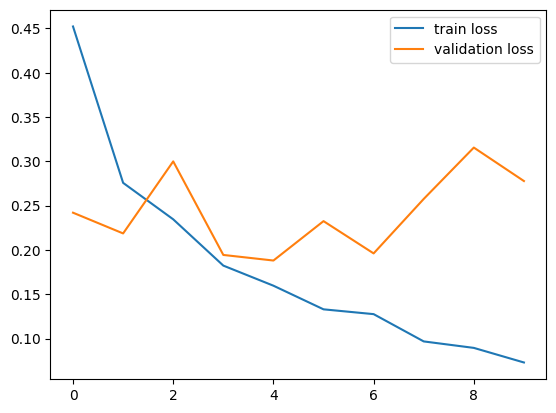

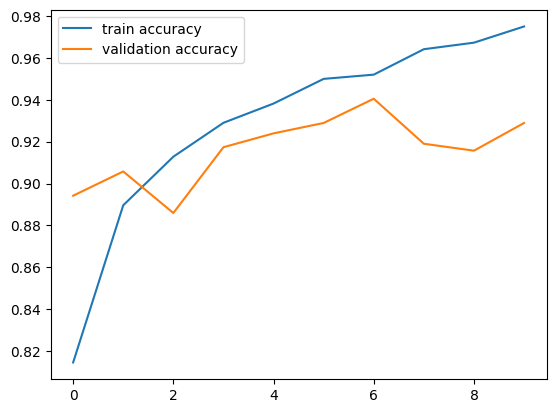

In [39]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test.jpeg


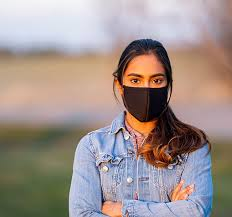

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.14605775 0.82047147]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)


if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')